In [1]:

# compare soft voting ensemble to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

 


# Example B: Cross Validation and Model Selection
Adapted from Sklearn Documentation — VotingClassifier & Cross Validation:

Aim: This is a working example on Cross Validation — evaluating candidate learners (classifiers) is conducted as shown in the example: Dataset: randomly created.

The general procedure in cross validation is as follows:

Shuffle the dataset randomly.

For each unique group:

1.Take the group as a hold out or test data set

2.Take the remaining groups as a training data set

3.Fit a model on the training set and evaluate it on the test set

4.Retain the evaluation score and discard the model

Summarise the skill of the model using the sample of model evaluation scores

In [2]:
 
# get the dataset - this is a synthetic dataset. 
def get_dataset():
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
return X, y
 
# get a voting ensemble of models. {please note models here are hypertuned at random — no nested cross validation applied. The assumption that it's a process that has been done earlier.} 
def get_voting():
# define the base models
models = list()
models.append(('DT', DecisionTreeClassifier(max_depth=4)))
models.append(('Knn', KNeighborsClassifier(n_neighbors=7)))
models.append(('svm1', SVC(gamma=.1, kernel='rbf', probability=True)))
models.append(('svm2', SVC(probability=True, kernel='poly', degree=1)))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
# define the voting ensemble
ensemble = VotingClassifier(estimators=models, voting='soft', weights=[1, 2, 1, 1, 2])
return ensemble

>DT 0.758 (0.050)
>Knn 0.899 (0.035)
>svm1 0.737 (0.051)
>svm2 0.855 (0.035)
>RF 0.896 (0.033)
>soft_voting 0.898 (0.036)


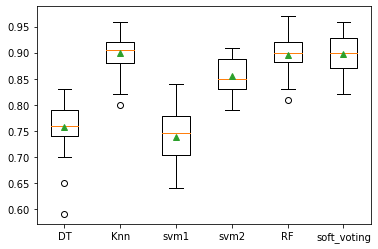

In [3]:

# get a list of models to evaluate
def get_models():
models = dict()
models['DT'] = DecisionTreeClassifier(max_depth=4)
models['Knn'] = KNeighborsClassifier(n_neighbors=7)
models['svm1'] = SVC(gamma=.1, kernel='rbf', probability=True)
models['svm2'] = SVC(probability=True, kernel='poly', degree=1)
models['RF'] = RandomForestClassifier(n_estimators=100)

models['soft_voting'] = get_voting()
return models
 
# evaluate a give model using cross-validation. 
# Note that evaluation is done with a stratified cross validation (and repeated, 3 times here). 
def evaluate_model(model, X, y):
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, error_score='raise')
return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
scores = evaluate_model(model, X, y)
results.append(scores)
names.append(name)
print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Tasks B
- Apply cross validation (change dataset in the code above) on Breast Cancer Dataset and report models' accuracy. Which candidate model is your best performing model?

- Soft voting is applied — tune weights on the basis of performance rank, and report pefrorance result of your voting classifier.

- Soft voting is applied — apply hard voting instead (voting='hard') and report peformance resuslts.

- Include Logistic Regression Classifier and report results.

- Note that RepeatedStratifiedKFold (which repeats Stratified K-Fold n times with different randomization in each repetition) is applied - read more on the moethod here. Now apply the Kfold cross validation instead — imported as from sklearn.model_selection import KFold with same nubmer of splits (folds) and compare resulsts with the RepeatedStratified validation - as KFold(n_splits=10, shuffle=True, random_state=1)

#### Cross Validation

Cross validation is a powerful tool that is used for estimating the predicitive power of your model, which performs better than the conventional training and test set. What we are doing with Cross Validation is we are essentially creating multiple training and test sets, then averaging the scores to give us a less biased metric.

In our case we are creating 10 sets within our data set that calculates the estimations we have done already, but then averages the prediction error to give us a more accurate representation of our model's prediction power, since the model's performance can vary significantly when utilizing different training and test sets.

Suggested Reading: For a more concise explanation of Cross Validation I recommend reading An Introduction to Statistical Learnings with Applications in R, specifically chapter 5.1!

## Classification technique on the Breast Cancer dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
# Dataset
dataset = pd.read_csv('data.csv')
dataset.drop('Unnamed: 32', inplace=True, axis=1)

In [78]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [79]:
print(dataset.shape)
dataset.describe()

(569, 32)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [80]:
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [81]:
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1:2].values

In [82]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [83]:
#categorical values
from sklearn.preprocessing import LabelEncoder
label_y = LabelEncoder()
y_train = label_y.fit_transform(y_train)
y_test = label_y.transform(y_test)

C:\Users\ASUS\Documents\0.DATA_SCIENCE_CODING\.anaconda\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [84]:
#fitting
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(n_jobs= -1)
classifier.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [85]:
#predicting
y_pred = classifier.predict(X_test)

In [86]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[73,  1],
       [ 5, 35]], dtype=int64)

In [87]:
# classification analysis
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        74
           1       0.97      0.88      0.92        40

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



#### K-Fold Cross Validation

 Here we are employing K-Fold Cross Validation, more specifically 10 folds. So therefore we are creating 10 subsets of our data where we will be employing the training and test set methodology then averaging the accuracy for all folds to give us our estimatation.

Within a Random Forest context if your data set is significantly large one can choose to not do cross validation and use the OOB error rate as an unbiased metric for computational costs, but for this tutorial I included it to show different accuracy metrics available.

In [88]:
# k-fold cross vallidation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train,cv= 10, n_jobs=-1)
print(accuracies.mean(), accuracies.std())

0.9406280193236715 0.03144808801753971
